ML Algorithm Implementation

In [ ]:
! pip install numpy matplotlib seaborn scikit-learn

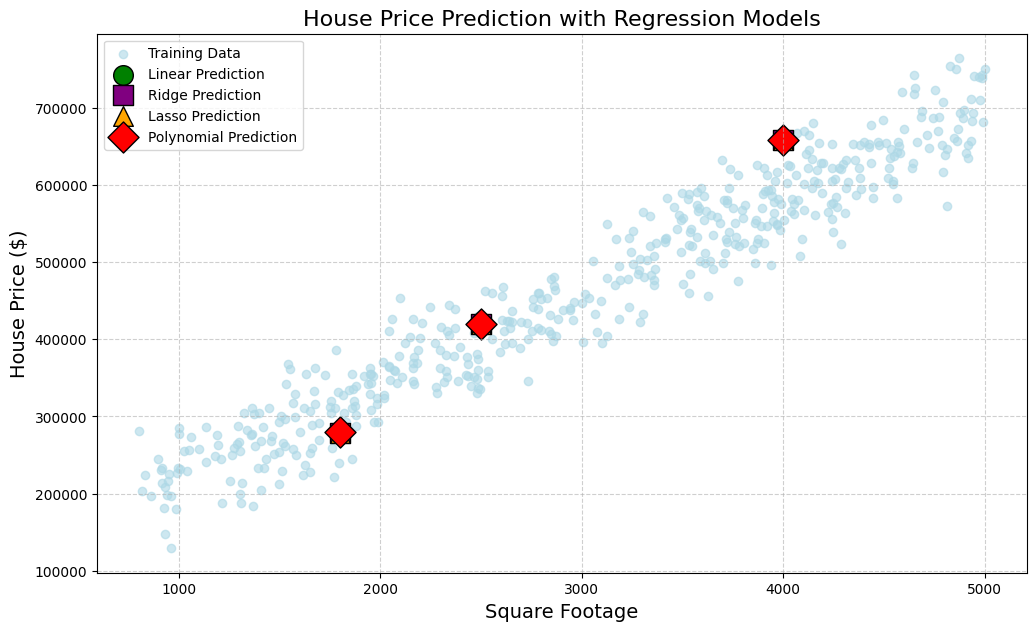

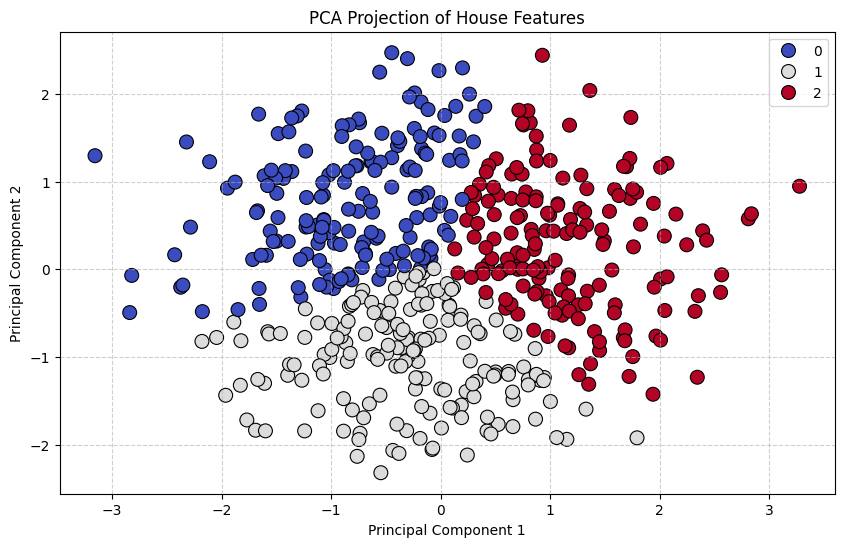

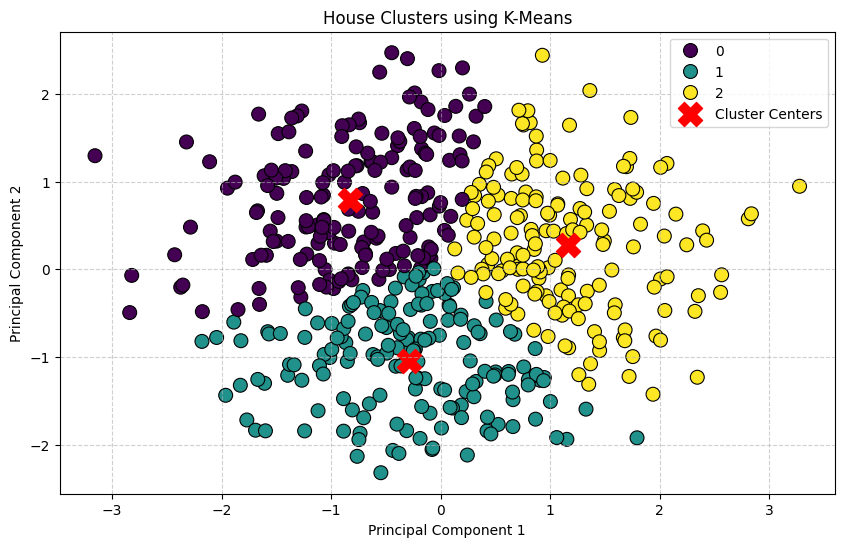

In [5]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Set random seed for reproducibility
np.random.seed(42)

# Generate a larger, more diverse dataset
num_samples = 500
sq_ft = np.random.randint(800, 5000, num_samples)
bedrooms = np.random.randint(1, 7, num_samples)
bathrooms = np.random.randint(1, 5, num_samples)
age = np.random.randint(1, 50, num_samples)
location_score = np.random.uniform(1, 10, num_samples)

# Define the house price with some noise
price = (sq_ft * 120) + (bedrooms * 15000) + (bathrooms * 12000) \
        - (age * 1000) + (location_score * 8000) + np.random.randint(-10000, 10000, num_samples)

# Feature matrix
X = np.column_stack((sq_ft, bedrooms, bathrooms, age, location_score))
y = price

# Train regression models
linear_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=1.0)
polynomial_model = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), LinearRegression())

linear_model.fit(X, y)
ridge_model.fit(X, y)
lasso_model.fit(X, y)
polynomial_model.fit(X, y)

# User input predictions
user_inputs = np.array([[2500, 3, 2, 10, 7.5], [4000, 5, 3, 5, 9.0], [1800, 2, 1, 20, 5.0]])
linear_pred = linear_model.predict(user_inputs)
ridge_pred = ridge_model.predict(user_inputs)
lasso_pred = lasso_model.predict(user_inputs)
poly_pred = polynomial_model.predict(user_inputs)

# PCA for dimensionality reduction
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)

# Visualization of Regression Results
plt.figure(figsize=(12, 7))
plt.scatter(X[:, 0], y, color='lightblue', alpha=0.6, label="Training Data")
plt.scatter(user_inputs[:, 0], linear_pred, color='green', marker='o', s=200, edgecolors='black', label="Linear Prediction")
plt.scatter(user_inputs[:, 0], ridge_pred, color='purple', marker='s', s=200, edgecolors='black', label="Ridge Prediction")
plt.scatter(user_inputs[:, 0], lasso_pred, color='orange', marker='^', s=200, edgecolors='black', label="Lasso Prediction")
plt.scatter(user_inputs[:, 0], poly_pred, color='red', marker='D', s=250, edgecolors='black', label="Polynomial Prediction")
plt.xlabel("Square Footage", fontsize=14)
plt.ylabel("House Price ($)", fontsize=14)
plt.title("House Price Prediction with Regression Models", fontsize=16)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Visualization of PCA Projection
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='coolwarm', s=100, edgecolors='black')
plt.title("PCA Projection of House Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Visualization of Clustering Results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', s=100, edgecolors='black')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='X', s=300, label='Cluster Centers')
plt.title("House Clusters using K-Means")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()